In [3119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3120]:
path=r'G:/personal_project/stockmarket/dn.csv'

In [3121]:
df=pd.read_csv(path)

In [3122]:
df.head()

,Date,Open,High,Low,Unnamed: 4,Close,Volume
0,19-07-2016,99.199997,104.500000,99.199997,NaN,97.821556,140708.0
1,20-07-2016,102.099998,103.000000,101.000000,NaN,97.390411,37323.0
2,21-07-2016,101.699997,103.199997,99.500000,NaN,96.192802,45431.0
3,22-07-2016,100.000000,104.199997,99.449997,NaN,97.582031,55353.0
4,25-07-2016,102.300003,103.699997,98.400002,NaN,95.234711,81706.0


In [3123]:

df=df.drop(["Unnamed: 4"],axis=1)

In [3124]:
df.dropna(inplace=True)

In [3125]:
df.head()
df=df.rename(columns={"Open":"open0","High":"high0","Low":"low0","Close":"close0","Volume":"volume0"})

In [3126]:
df["open1"]=df["open0"].shift(periods=1)
df["high1"]=df["high0"].shift(periods=1)
df["low1"]=df["low0"].shift(periods=1)
df["close1"]=df["close0"].shift(periods=1)
df["volume1"]=df["volume0"].shift(periods=1)
df["open2"]=df["open0"].shift(periods=2)
df["high2"]=df["high0"].shift(periods=2)
df["low2"]=df["low0"].shift(periods=2)
df["close2"]=df["close0"].shift(periods=2)
df["volume2"]=df["volume0"].shift(periods=2)
df["open3"]=df["open0"].shift(periods=3)
df["high3"]=df["high0"].shift(periods=3)
df["low3"]=df["low0"].shift(periods=3)
df["close3"]=df["close0"].shift(periods=3)
df["volume3"]=df["volume0"].shift(periods=3)
df["open4"]=df["open0"].shift(periods=4)
df["high4"]=df["high0"].shift(periods=4)
df["low4"]=df["low0"].shift(periods=4)
df["close4"]=df["close0"].shift(periods=4)
df["volume4"]=df["volume0"].shift(periods=4)
df["open5"]=df["open0"].shift(periods=5)
df["high5"]=df["high0"].shift(periods=5)
df["low5"]=df["low0"].shift(periods=5)
df["close5"]=df["close0"].shift(periods=5)
df["volume5"]=df["volume0"].shift(periods=5)
df["open6"]=df["open0"].shift(periods=6)
df["high6"]=df["high0"].shift(periods=6)
df["low6"]=df["low0"].shift(periods=6)
df["close6"]=df["close0"].shift(periods=6)
df["volume6"]=df["volume0"].shift(periods=6)


In [3127]:
df["1_day_%_change"]=df["close1"]/df["close2"]
df["2_day_%_change"]=df["close1"]/df["close3"]
df["3_day_%_change"]=df["close1"]/df["close4"]
df["4_day_%_change"]=df["close1"]/df["close5"]
df["5_day_%_change"]=df["close1"]/df["close6"]

'''
df["2_day_%_volume"]=df["volume1"]/df["volume2"]
df["3_day_%_volume"]=df["volume1"]/df["volume3"]
df["4_day_%_volume"]=df["volume1"]/df["volume4"]
df["5_day_%_volume"]=df["volume1"]/df["volume5"]
df["6_day_%_volume"]=df["volume1"]/df["volume6"]

df["2_3_day_%_volume"]=df["volume2"]/df["volume3"]
df["3_4_day_%_volume"]=df["volume3"]/df["volume4"]
df["4_5_day_%_volume"]=df["volume4"]/df["volume5"]
df["5_6_day_%_volume"]=df["volume5"]/df["volume6"]
'''



df["2_3_day_%_change"]=df["close2"]/df["close3"]
df["3_4_day_%_change"]=df["close3"]/df["close4"]
df["4_5_day_%_change"]=df["close4"]/df["close5"]
df["5_6_day_%_change"]=df["close5"]/df["close6"]

df["money_flow_index"] =((df["close1"]+df["low1"]+df["high1"])*df["volume1"]/3)

df["moving_avg_5"]= df["close1"].rolling(2).mean()
df["moving_avg_10"]= df["close1"].rolling(3).mean()
df["moving_avg_15"]= df["close1"].rolling(4).mean()

df["moving_avg_6"]= df["close1"].rolling(6).mean()
df["moving_avg_7"]= df["close1"].rolling(7).mean()
df["moving_avg_8"]= df["close1"].rolling(8).mean()
df["moving_avg_9"]= df["close1"].rolling(9).mean()

df["moving_avg_11"]= df["close1"].rolling(11).mean()

df["moving_avg_20"]=df["close1"].rolling(20).mean()
df["bb_upper"] = df["moving_avg_20"]+(2*(df["close1"].rolling(20).std()))
df["bb_lower"] = df["moving_avg_20"]-(2*(df["close1"].rolling(20).std()))
df["bb_width"] = df["bb_upper"]- df["bb_lower"] 
#RSI calculation

df["price_change"] = df["close1"]/df["close2"]

df.loc[df["close1"]>df["close2"], "up_move?"] = df["close1"]/df["close2"]
df.loc[df["close1"]<df["close2"], "up_move?"] = 0
df.loc[df["close1"]==df["close2"], "up_move?"] = 0

df.loc[df["close1"]<df["close2"], "down_move?"] = np.absolute(df["close1"]/df["close2"])
df.loc[df["close1"]>df["close2"], "down_move?"] = 0
df.loc[df["close1"]==df["close2"], "down_move?"] = 0

df["avg_up_move"]= df["up_move?"].rolling(14).mean()

df["avg_down_move"]=df["down_move?"].rolling(14).mean()



df["rs"] = df["avg_up_move"]/df["avg_down_move"]
df["rsi"]= 100-(100/(df["rs"]+1))



df.dropna(inplace=True)

df["op_close"]=df["open1"]-df["close1"]
df["op_low"]=df["open1"]-df["low1"]
df["op_high"]=df["open1"]-df["high1"]


In [3128]:
df["rsi"].describe()

count    1212.000000
mean       51.265925
std        12.840740
min         7.359236
25%        43.582134
50%        50.970862
75%        58.295048
max        86.225509
Name: rsi, dtype: float64

In [3129]:
df.loc[df["close1"]>df["open1"], "today_bullish?"] = 1
df.loc[df["close1"]<df["open1"], "today_bullish?"] = 0
df.loc[df["close1"]==df["open1"], "today_bullish?"] = 0


In [3130]:
df.tail()

,Date,open0,high0,low0,close0,volume0,open1,high1,low1,close1,...,up_move?,down_move?,avg_up_move,avg_down_move,rs,rsi,op_close,op_low,op_high,today_bullish?
1229,12-07-2021,1955.000000,1983.000000,1945.400024,1952.050049,1047253.0,1930.000000,1953.849976,1918.099976,1940.750000,...,1.001936,0.000000,0.511349,0.496367,1.030182,50.743343,-10.750000,11.900024,-23.849976,1.0
1230,13-07-2021,1969.650024,1976.000000,1935.599976,1947.849976,615436.0,1955.000000,1983.000000,1945.400024,1952.050049,...,1.005823,0.000000,0.511049,0.496367,1.029578,50.728685,2.949951,9.599976,-28.000000,0.0
1231,14-07-2021,1946.000000,1999.500000,1945.000000,1958.349976,1472141.0,1969.650024,1976.000000,1935.599976,1947.849976,...,0.000000,0.997848,0.511049,0.496422,1.029465,50.725923,21.800048,34.050048,-6.349976,0.0
1232,15-07-2021,1969.000000,1974.650024,1937.400024,1946.849976,489056.0,1946.000000,1999.500000,1945.000000,1958.349976,...,1.005391,0.000000,0.582862,0.425669,1.369284,57.793158,-12.349976,1.000000,-53.500000,1.0
1233,16-07-2021,1954.000000,1974.000000,1945.000000,1951.500000,491113.0,1969.000000,1974.650024,1937.400024,1946.849976,...,0.000000,0.994128,0.509669,0.496679,1.026154,50.645418,22.150024,31.599976,-5.650024,0.0


In [3131]:
df.columns

Index(['Date', 'open0', 'high0', 'low0', 'close0', 'volume0', 'open1', 'high1',
       'low1', 'close1', 'volume1', 'open2', 'high2', 'low2', 'close2',
       'volume2', 'open3', 'high3', 'low3', 'close3', 'volume3', 'open4',
       'high4', 'low4', 'close4', 'volume4', 'open5', 'high5', 'low5',
       'close5', 'volume5', 'open6', 'high6', 'low6', 'close6', 'volume6',
       '1_day_%_change', '2_day_%_change', '3_day_%_change', '4_day_%_change',
       '5_day_%_change', '2_3_day_%_change', '3_4_day_%_change',
       '4_5_day_%_change', '5_6_day_%_change', 'money_flow_index',
       'moving_avg_5', 'moving_avg_10', 'moving_avg_15', 'moving_avg_6',
       'moving_avg_7', 'moving_avg_8', 'moving_avg_9', 'moving_avg_11',
       'moving_avg_20', 'bb_upper', 'bb_lower', 'bb_width', 'price_change',
       'up_move?', 'down_move?', 'avg_up_move', 'avg_down_move', 'rs', 'rsi',
       'op_close', 'op_low', 'op_high', 'today_bullish?'],
      dtype='object')

In [3132]:
df["label"]=df["close0"]
"""df = df.drop(['Date', 'open0', 'high0', 'low0',  'volume0',"close0", 'open1', 'high1',
       'low1',   'open2',"money_flow_index", 'high2', 'low2', 'close2',
       'volume2', 'open3', 'high3', 'low3', 'close3', 'volume3', 'open4',
       'high4', 'low4', 'close4', 'volume4', 'open5', 'high5', 'low5',
       'close5', 'volume5', 'open6', 'high6', 'low6', 'close6', 'volume6',"price_change" ,'moving_avg_6', 'moving_avg_7',
       'moving_avg_8', 'moving_avg_9', 'moving_avg_11','moving_avg_5','moving_avg_10','moving_avg_15','up_move?',
       'down_move?', 'avg_up_move', 'avg_down_move', 'rs'],axis=1)
"""
df = df.drop(["Date", "open0", "high0", "low0",  "volume0","close0"],axis=1)

In [3133]:

df.head()


,open1,high1,low1,close1,volume1,open2,high2,low2,close2,volume2,...,down_move?,avg_up_move,avg_down_move,rs,rsi,op_close,op_low,op_high,today_bullish?,label
20,102.300003,102.949997,100.000000,97.822372,81297.0,102.750000,102.750000,100.150002,97.967865,66673.0,...,0.998515,0.366251,0.636058,0.575815,36.540755,4.477631,2.300003,-0.649994,0.0,98.501366
21,101.900002,102.949997,100.000000,98.501366,55114.0,102.300003,102.949997,100.000000,97.822372,81297.0,...,0.000000,0.438176,0.565458,0.774904,43.658922,3.398636,1.900002,-1.049995,0.0,101.168816
22,102.199997,107.300003,101.550003,101.168816,184121.0,101.900002,102.949997,100.000000,98.501366,55114.0,...,0.000000,0.437489,0.565458,0.773690,43.620353,1.031181,0.649994,-5.100006,0.0,99.422844
23,103.550003,104.500000,102.300003,99.422844,86627.0,102.199997,107.300003,101.550003,101.168816,184121.0,...,0.982742,0.364173,0.635654,0.572911,36.423623,4.127159,1.250000,-0.949997,0.0,100.489807
24,102.050003,104.650002,101.800003,100.489807,62940.0,103.550003,104.500000,102.300003,99.422844,86627.0,...,0.000000,0.436368,0.564850,0.772539,43.583750,1.560196,0.250000,-2.599999,0.0,99.810829


In [3134]:
new_df=df

In [3135]:
new_df.head()

,open1,high1,low1,close1,volume1,open2,high2,low2,close2,volume2,...,down_move?,avg_up_move,avg_down_move,rs,rsi,op_close,op_low,op_high,today_bullish?,label
20,102.300003,102.949997,100.000000,97.822372,81297.0,102.750000,102.750000,100.150002,97.967865,66673.0,...,0.998515,0.366251,0.636058,0.575815,36.540755,4.477631,2.300003,-0.649994,0.0,98.501366
21,101.900002,102.949997,100.000000,98.501366,55114.0,102.300003,102.949997,100.000000,97.822372,81297.0,...,0.000000,0.438176,0.565458,0.774904,43.658922,3.398636,1.900002,-1.049995,0.0,101.168816
22,102.199997,107.300003,101.550003,101.168816,184121.0,101.900002,102.949997,100.000000,98.501366,55114.0,...,0.000000,0.437489,0.565458,0.773690,43.620353,1.031181,0.649994,-5.100006,0.0,99.422844
23,103.550003,104.500000,102.300003,99.422844,86627.0,102.199997,107.300003,101.550003,101.168816,184121.0,...,0.982742,0.364173,0.635654,0.572911,36.423623,4.127159,1.250000,-0.949997,0.0,100.489807
24,102.050003,104.650002,101.800003,100.489807,62940.0,103.550003,104.500000,102.300003,99.422844,86627.0,...,0.000000,0.436368,0.564850,0.772539,43.583750,1.560196,0.250000,-2.599999,0.0,99.810829


In [3136]:
correlation=new_df.corr()
correlation

,open1,high1,low1,close1,volume1,open2,high2,low2,close2,volume2,...,down_move?,avg_up_move,avg_down_move,rs,rsi,op_close,op_low,op_high,today_bullish?,label
open1,1.000000,0.999578,0.999699,0.999338,0.486609,0.999166,0.999686,0.999464,0.999901,0.499840,...,0.012122,0.058323,-0.033507,0.064582,0.045676,-0.059726,0.611221,-0.559233,0.229849,0.998590
high1,0.999578,1.000000,0.999508,0.999787,0.500367,0.998677,0.999348,0.998919,0.999506,0.502793,...,0.001310,0.062927,-0.037982,0.068941,0.050171,-0.083591,0.603509,-0.583085,0.244499,0.999095
low1,0.999699,0.999508,1.000000,0.999596,0.483637,0.998947,0.999338,0.999324,0.999635,0.495265,...,0.002943,0.059969,-0.035250,0.066230,0.047390,-0.075029,0.591617,-0.565659,0.237814,0.998846
close1,0.999338,0.999787,0.999596,1.000000,0.496037,0.998578,0.999087,0.998838,0.999304,0.498843,...,-0.005315,0.063188,-0.038272,0.069317,0.050472,-0.096000,0.592807,-0.583705,0.250979,0.999311
volume1,0.486609,0.500367,0.483637,0.496037,1.000000,0.476545,0.485495,0.476487,0.485101,0.631578,...,-0.120464,0.194163,-0.176278,0.165134,0.184418,-0.296609,0.388579,-0.670528,0.361440,0.495908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
op_close,-0.059726,-0.083591,-0.075029,-0.096000,-0.296609,-0.061679,-0.061433,-0.060662,-0.061502,-0.011570,...,0.477506,-0.138039,0.133371,-0.134947,-0.135146,1.000000,0.457684,0.715045,-0.597694,-0.097562
op_low,0.611221,0.603509,0.591617,0.592807,0.388579,0.608096,0.612555,0.605696,0.610045,0.448225,...,0.303338,-0.018020,0.036076,-0.014301,-0.027796,0.457684,1.000000,-0.129132,-0.118665,0.592380
op_high,-0.559233,-0.583085,-0.565659,-0.583705,-0.670528,-0.556843,-0.561474,-0.555426,-0.559960,-0.369800,...,0.301554,-0.164679,0.146826,-0.161271,-0.154351,0.715045,-0.129132,1.000000,-0.549284,-0.584900
today_bullish?,0.229849,0.244499,0.237814,0.250979,0.361440,0.231728,0.231737,0.229893,0.231881,0.131644,...,-0.492175,0.137337,-0.130277,0.125164,0.133811,-0.597694,-0.118665,-0.549284,1.000000,0.251917


<AxesSubplot:>

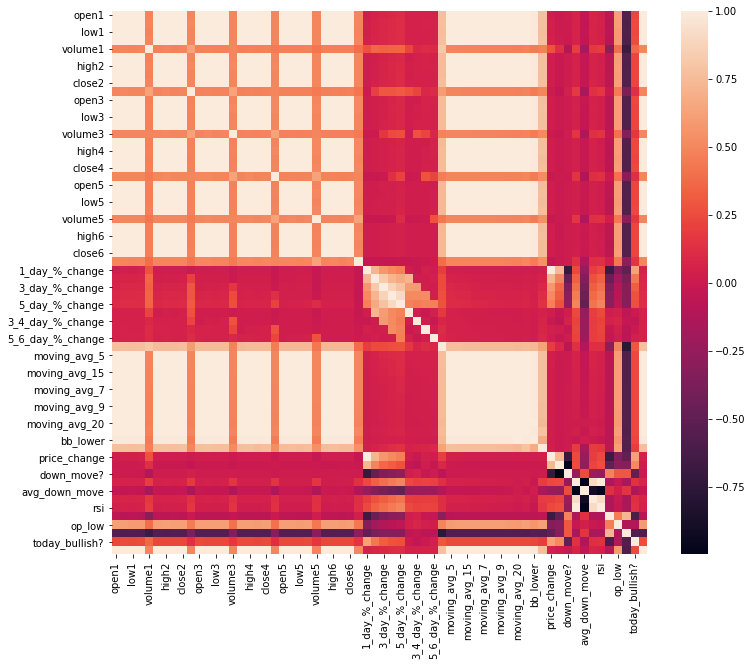

In [3137]:
plt.figure(figsize=(12,10))
sns.heatmap(correlation)

In [3138]:
from sklearn.model_selection import train_test_split


In [3139]:
x=new_df.drop(["label"],axis=1)
y=(new_df["label"])

In [3140]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=2021)

In [3141]:
new_df.shape

(1212, 64)

In [3142]:
from sklearn.ensemble import RandomForestRegressor

In [3143]:

from xgboost import XGBRegressor


In [3144]:
#forest= XGBRegressor(n_estimators=10000,max_depth=None)
forest = RandomForestRegressor(n_estimators=500,criterion='mse', max_depth=25, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=True, n_jobs=-1, random_state=42, verbose=3, warm_start=False, ccp_alpha=0.0, max_samples=None)

In [3145]:
forest.fit(xtrain,ytrain)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 500
building tree 2 of 500
building tree 3 of 500building tree 4 of 500

building tree 5 of 500
building tree 6 of 500
building tree 7 of 500
building tree 8 of 500
building tree 9 of 500building tree 10 of 500building tree 11 of 500

building tree 12 of 500

building tree 13 of 500
building tree 14 of 500building tree 15 of 500

building tree 16 of 500
building tree 17 of 500
building tree 18 of 500building tree 19 of 500

building tree 20 of 500
building tree 21 of 500
building tree 22 of 500
building tree 23 of 500
building tree 24 of 500
building tree 25 of 500
building tree 26 of 500
building tree 27 of 500
building tree 28 of 500


[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.5s


building tree 29 of 500building tree 30 of 500building tree 31 of 500


building tree 32 of 500
building tree 33 of 500
building tree 34 of 500
building tree 35 of 500
building tree 36 of 500
building tree 37 of 500
building tree 38 of 500
building tree 39 of 500
building tree 40 of 500
building tree 41 of 500
building tree 42 of 500
building tree 43 of 500
building tree 44 of 500
building tree 45 of 500
building tree 46 of 500building tree 47 of 500

building tree 48 of 500
building tree 49 of 500
building tree 50 of 500
building tree 51 of 500building tree 52 of 500
building tree 53 of 500
building tree 54 of 500building tree 55 of 500

building tree 56 of 500

building tree 57 of 500
building tree 58 of 500building tree 59 of 500
building tree 60 of 500
building tree 61 of 500
building tree 62 of 500
building tree 63 of 500

building tree 64 of 500
building tree 65 of 500
building tree 66 of 500
building tree 67 of 500building tree 68 of 500
building tree 69 of 500
building tree 70 

[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    3.5s


building tree 128 of 500
building tree 129 of 500
building tree 130 of 500building tree 131 of 500
building tree 132 of 500

building tree 133 of 500
building tree 134 of 500
building tree 135 of 500
building tree 136 of 500
building tree 137 of 500
building tree 138 of 500
building tree 139 of 500building tree 140 of 500
building tree 141 of 500

building tree 142 of 500
building tree 143 of 500
building tree 144 of 500building tree 145 of 500

building tree 146 of 500
building tree 147 of 500
building tree 148 of 500
building tree 149 of 500
building tree 150 of 500
building tree 151 of 500
building tree 152 of 500
building tree 153 of 500
building tree 154 of 500
building tree 155 of 500
building tree 156 of 500building tree 157 of 500

building tree 158 of 500
building tree 159 of 500
building tree 160 of 500
building tree 161 of 500
building tree 162 of 500
building tree 163 of 500building tree 164 of 500

building tree 165 of 500
building tree 166 of 500
building tree 167 of 500


[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:    8.1s


building tree 281 of 500

building tree 282 of 500building tree 283 of 500

building tree 284 of 500building tree 285 of 500

building tree 286 of 500
building tree 287 of 500
building tree 288 of 500
building tree 289 of 500
building tree 290 of 500
building tree 291 of 500
building tree 292 of 500
building tree 293 of 500
building tree 294 of 500
building tree 295 of 500
building tree 296 of 500
building tree 297 of 500building tree 298 of 500

building tree 299 of 500
building tree 300 of 500building tree 301 of 500

building tree 302 of 500
building tree 303 of 500building tree 304 of 500
building tree 305 of 500

building tree 306 of 500
building tree 307 of 500
building tree 308 of 500
building tree 309 of 500
building tree 310 of 500building tree 311 of 500

building tree 312 of 500building tree 313 of 500

building tree 314 of 500
building tree 315 of 500
building tree 316 of 500
building tree 317 of 500
building tree 318 of 500building tree 319 of 500

building tree 320 of 500

[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   13.3s finished


RandomForestRegressor(max_depth=25, n_estimators=500, n_jobs=-1, oob_score=True,
                      random_state=42, verbose=3)

In [3146]:
predict = forest.predict(xtest)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.0s finished


In [3147]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import max_error

print("r2")
print(" ")
print(r2_score(ytest,predict))
print(" ")
print("mae")
mae=mean_absolute_error(ytest,predict)
print(mae)
print(" ")
print("rmse")
rmse=np.sqrt(mean_squared_error(ytest,predict))
print(rmse)
print(" ")
print("rmsle")
print(np.sqrt(mean_squared_log_error(ytest,predict)))
print(" ")
print("max_error")
print(max_error(ytest,predict))


error = (ytest-predict)











r2
 
0.9982227919604821
 
mae
9.677210287862744
 
rmse
18.50026266165456
 
rmsle
0.030898038249021133
 
max_error
117.56918635999432


In [3148]:
error

893     -3.950871
1211     2.408761
339     -7.426297
737      2.340296
486     -8.161940
          ...    
916     34.738589
145     -0.873855
592      7.169484
1161    11.028297
1048   -12.548469
Name: label, Length: 364, dtype: float64

<AxesSubplot:xlabel='label', ylabel='Count'>

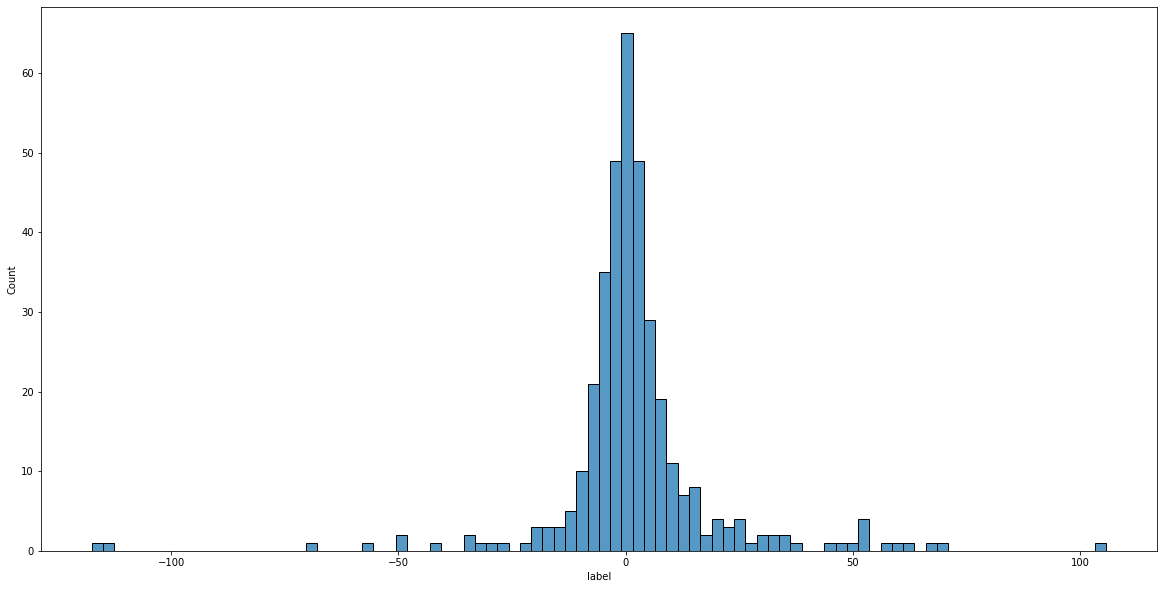

In [3149]:
plt.figure(figsize=(20,10))
sns.histplot(error)

In [3150]:
np.percentile(error,95)

30.759349057604037

In [3151]:
np.percentile(error,5)

-16.843758836700058

In [3152]:
xtrain.columns

Index(['open1', 'high1', 'low1', 'close1', 'volume1', 'open2', 'high2', 'low2',
       'close2', 'volume2', 'open3', 'high3', 'low3', 'close3', 'volume3',
       'open4', 'high4', 'low4', 'close4', 'volume4', 'open5', 'high5', 'low5',
       'close5', 'volume5', 'open6', 'high6', 'low6', 'close6', 'volume6',
       '1_day_%_change', '2_day_%_change', '3_day_%_change', '4_day_%_change',
       '5_day_%_change', '2_3_day_%_change', '3_4_day_%_change',
       '4_5_day_%_change', '5_6_day_%_change', 'money_flow_index',
       'moving_avg_5', 'moving_avg_10', 'moving_avg_15', 'moving_avg_6',
       'moving_avg_7', 'moving_avg_8', 'moving_avg_9', 'moving_avg_11',
       'moving_avg_20', 'bb_upper', 'bb_lower', 'bb_width', 'price_change',
       'up_move?', 'down_move?', 'avg_up_move', 'avg_down_move', 'rs', 'rsi',
       'op_close', 'op_low', 'op_high', 'today_bullish?'],
      dtype='object')

In [3153]:
new_df.tail()


,open1,high1,low1,close1,volume1,open2,high2,low2,close2,volume2,...,down_move?,avg_up_move,avg_down_move,rs,rsi,op_close,op_low,op_high,today_bullish?,label
1229,1930.000000,1953.849976,1918.099976,1940.750000,613501.0,1947.699951,1977.650024,1928.099976,1937.000000,1684727.0,...,0.000000,0.511349,0.496367,1.030182,50.743343,-10.750000,11.900024,-23.849976,1.0,1952.050049
1230,1955.000000,1983.000000,1945.400024,1952.050049,1047253.0,1930.000000,1953.849976,1918.099976,1940.750000,613501.0,...,0.000000,0.511049,0.496367,1.029578,50.728685,2.949951,9.599976,-28.000000,0.0,1947.849976
1231,1969.650024,1976.000000,1935.599976,1947.849976,615436.0,1955.000000,1983.000000,1945.400024,1952.050049,1047253.0,...,0.997848,0.511049,0.496422,1.029465,50.725923,21.800048,34.050048,-6.349976,0.0,1958.349976
1232,1946.000000,1999.500000,1945.000000,1958.349976,1472141.0,1969.650024,1976.000000,1935.599976,1947.849976,615436.0,...,0.000000,0.582862,0.425669,1.369284,57.793158,-12.349976,1.000000,-53.500000,1.0,1946.849976
1233,1969.000000,1974.650024,1937.400024,1946.849976,489056.0,1946.000000,1999.500000,1945.000000,1958.349976,1472141.0,...,0.994128,0.509669,0.496679,1.026154,50.645418,22.150024,31.599976,-5.650024,0.0,1951.500000


In [3154]:
new_df.shape

(1212, 64)

In [3155]:
new_data = (new_df.iloc[1150:1200])
new_data

,open1,high1,low1,close1,volume1,open2,high2,low2,close2,volume2,...,down_move?,avg_up_move,avg_down_move,rs,rsi,op_close,op_low,op_high,today_bullish?,label
1172,1549.599976,1571.900024,1533.250000,1558.849976,469972.0,1614.949951,1625.000000,1582.000000,1587.949951,790412.0,...,0.981675,0.582255,0.419191,1.388996,58.141416,-9.250000,16.349976,-22.300048,1.0,1559.849976
1173,1585.599976,1595.750000,1550.000000,1559.849976,430408.0,1549.599976,1571.900024,1533.250000,1558.849976,469972.0,...,0.000000,0.581051,0.419191,1.386123,58.091019,25.750000,35.599976,-10.150024,0.0,1598.550049
1174,1552.000000,1609.000000,1550.000000,1598.550049,598104.0,1585.599976,1595.750000,1550.000000,1559.849976,430408.0,...,0.000000,0.579844,0.419191,1.383245,58.040398,-46.550049,2.000000,-57.000000,1.0,1627.849976
1175,1611.550049,1673.849976,1607.349976,1627.849976,1531076.0,1552.000000,1609.000000,1550.000000,1598.550049,598104.0,...,0.000000,0.579818,0.419191,1.383182,58.039300,-16.299927,4.200073,-62.299927,1.0,1637.500000
1176,1648.400024,1654.599976,1607.000000,1637.500000,1464576.0,1611.550049,1673.849976,1607.349976,1627.849976,1531076.0,...,0.000000,0.651670,0.348183,1.871630,65.176574,10.900024,41.400024,-6.199952,0.0,1782.550049
1177,1650.000000,1795.000000,1650.000000,1782.550049,4531215.0,1648.400024,1654.599976,1607.000000,1637.500000,1464576.0,...,0.000000,0.729426,0.278038,2.623471,72.402152,-132.550049,0.000000,-145.000000,1.0,1780.449951
1178,1805.000000,1850.000000,1755.000000,1780.449951,3388293.0,1650.000000,1795.000000,1650.000000,1782.550049,4531215.0,...,0.998822,0.656230,0.349383,1.878256,65.256736,24.550049,50.000000,-45.000000,0.0,1787.250000
1179,1800.000000,1827.699951,1775.050049,1787.250000,1225613.0,1805.000000,1850.000000,1755.000000,1780.449951,3388293.0,...,0.000000,0.654744,0.349383,1.874003,65.205326,12.750000,24.949951,-27.699951,0.0,1865.599976
1180,1787.000000,1900.000000,1767.900024,1865.599976,2623486.0,1800.000000,1827.699951,1775.050049,1787.250000,1225613.0,...,0.000000,0.657280,0.349383,1.881262,65.292983,-78.599976,19.099976,-113.000000,1.0,1904.099976
1181,1865.599976,1955.000000,1855.599976,1904.099976,2911349.0,1787.000000,1900.000000,1767.900024,1865.599976,2623486.0,...,0.000000,0.730183,0.279241,2.614882,72.336583,-38.500000,10.000000,-89.400024,1.0,1863.750000


In [3156]:
new_data=new_data.drop("label",axis=1)

In [3157]:
new_data=np.array(new_data)
new_data

array([[ 1.54959998e+03,  1.57190002e+03,  1.53325000e+03, ...,
         1.63499760e+01, -2.23000480e+01,  1.00000000e+00],
       [ 1.58559998e+03,  1.59575000e+03,  1.55000000e+03, ...,
         3.55999760e+01, -1.01500240e+01,  0.00000000e+00],
       [ 1.55200000e+03,  1.60900000e+03,  1.55000000e+03, ...,
         2.00000000e+00, -5.70000000e+01,  1.00000000e+00],
       ...,
       [ 1.74880005e+03,  1.80300000e+03,  1.73709998e+03, ...,
         1.17000730e+01, -5.41999510e+01,  1.00000000e+00],
       [ 1.79430005e+03,  1.81400000e+03,  1.77105005e+03, ...,
         2.32500000e+01, -1.96999510e+01,  0.00000000e+00],
       [ 1.77700000e+03,  1.78990002e+03,  1.74759998e+03, ...,
         2.94000240e+01, -1.29000240e+01,  0.00000000e+00]])

In [3158]:
data=new_data.reshape(50,-1)

In [3159]:

predicted_ans=(forest.predict(data))

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.0s finished


In [3160]:
predicted_ans

array([1573.96559768, 1585.5445948 , 1638.15378615, 1668.34520485,
       1730.21213389, 1775.65927216, 1786.586001  , 1832.85248977,
       1884.90748175, 1876.73039384, 1903.65599438, 1897.76326895,
       1917.10389038, 1798.6209271 , 1786.45287535, 1777.20851216,
       1769.70040843, 1738.53831882, 1748.08242103, 1775.34731881,
       1772.18267347, 1767.62022048, 1763.93611869, 1775.32011552,
       1789.84348735, 1768.26883705, 1762.62481843, 1778.16912183,
       1763.88499051, 1755.79409472, 1745.52431007, 1741.2109221 ,
       1753.89652488, 1755.66792232, 1848.39928854, 1784.05647283,
       1791.13843567, 1776.06383461, 1771.56459378, 1772.19121537,
       1764.44011721, 1758.59533778, 1749.97243785, 1759.55163998,
       1761.56362061, 1750.78950853, 1760.46422094, 1776.00841356,
       1768.35543447, 1789.75633948])

In [3161]:
actual_ans  = (new_df.iloc[1150:1200])
actual_ans = np.array(actual_ans["label"])
actual_ans

array([1559.849976, 1598.550049, 1627.849976, 1637.5     , 1782.550049,
       1780.449951, 1787.25    , 1865.599976, 1904.099976, 1863.75    ,
       1904.      , 1891.199951, 1803.050049, 1775.800049, 1797.449951,
       1791.300049, 1728.099976, 1718.650024, 1794.300049, 1775.400024,
       1774.199951, 1762.150024, 1787.150024, 1805.349976, 1784.849976,
       1765.300049, 1794.300049, 1785.400024, 1760.349976, 1752.349976,
       1740.25    , 1731.650024, 1754.150024, 1825.650024, 1778.5     ,
       1785.699951, 1791.800049, 1769.800049, 1775.099976, 1774.599976,
       1772.849976, 1754.800049, 1746.550049, 1764.050049, 1758.900024,
       1742.25    , 1785.300049, 1775.949951, 1760.300049, 1808.550049])

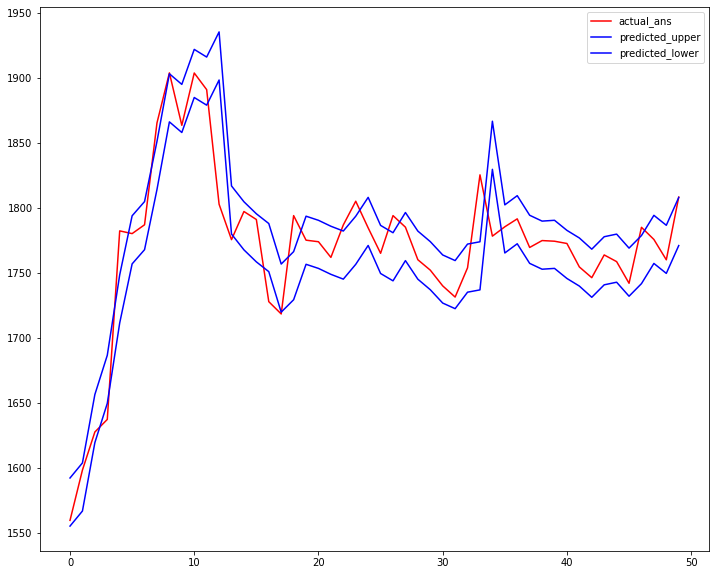

In [3162]:
plt.figure(figsize=(12,10))

plt.plot(actual_ans,label="actual_ans",color='r')


plt.plot(predicted_ans+rmse,label="predicted_upper",color='b')
plt.plot(predicted_ans-rmse,label="predicted_lower",color='b')
plt.legend();

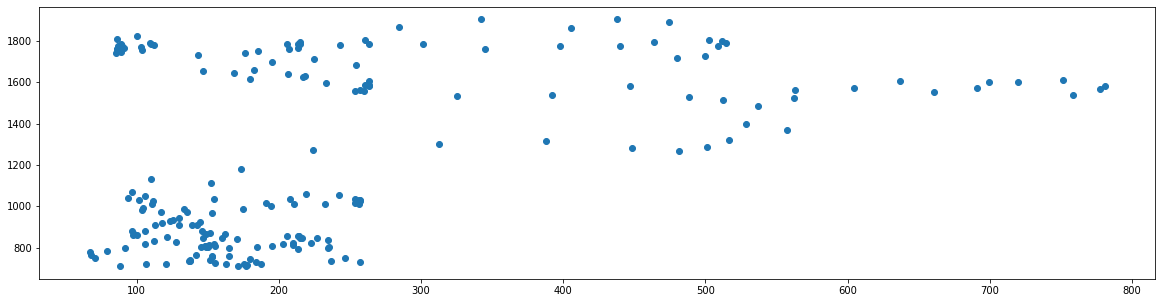

In [3163]:

plt.figure(figsize=(20,5))

data = new_df.iloc[1000:1200]
bb_width = data["bb_width"]
label = data["label"]
plt.scatter(bb_width,label)





In [3164]:
print("tommorow the price of stock may be between",ans-mae,"and",ans+mae, "based on mae")

tommorow the price of stock may be between [1908.32284024 1916.52703899 1875.83946471 1905.70612725 1925.63010501
 1930.51865742 1932.32560781 1937.94552135 1934.70375972] and [1927.67726081 1935.88145956 1895.19388528 1925.06054783 1944.98452558
 1949.873078   1951.68002838 1957.29994192 1954.0581803 ] based on mae


In [3165]:
xtrain.columns

Index(['open1', 'high1', 'low1', 'close1', 'volume1', 'open2', 'high2', 'low2',
       'close2', 'volume2', 'open3', 'high3', 'low3', 'close3', 'volume3',
       'open4', 'high4', 'low4', 'close4', 'volume4', 'open5', 'high5', 'low5',
       'close5', 'volume5', 'open6', 'high6', 'low6', 'close6', 'volume6',
       '1_day_%_change', '2_day_%_change', '3_day_%_change', '4_day_%_change',
       '5_day_%_change', '2_3_day_%_change', '3_4_day_%_change',
       '4_5_day_%_change', '5_6_day_%_change', 'money_flow_index',
       'moving_avg_5', 'moving_avg_10', 'moving_avg_15', 'moving_avg_6',
       'moving_avg_7', 'moving_avg_8', 'moving_avg_9', 'moving_avg_11',
       'moving_avg_20', 'bb_upper', 'bb_lower', 'bb_width', 'price_change',
       'up_move?', 'down_move?', 'avg_up_move', 'avg_down_move', 'rs', 'rsi',
       'op_close', 'op_low', 'op_high', 'today_bullish?'],
      dtype='object')

In [3166]:
import pickle
pickle.dump(forest, open(r'G:\personal_project\stockmarket\deepak_nitrite\dn.pkl', 'wb'))

In [3167]:
model =  pickle.load(open(r'G:\personal_project\stockmarket\deepak_nitrite\dn.pkl', 'rb'))

In [3168]:
xtrain.columns

Index(['open1', 'high1', 'low1', 'close1', 'volume1', 'open2', 'high2', 'low2',
       'close2', 'volume2', 'open3', 'high3', 'low3', 'close3', 'volume3',
       'open4', 'high4', 'low4', 'close4', 'volume4', 'open5', 'high5', 'low5',
       'close5', 'volume5', 'open6', 'high6', 'low6', 'close6', 'volume6',
       '1_day_%_change', '2_day_%_change', '3_day_%_change', '4_day_%_change',
       '5_day_%_change', '2_3_day_%_change', '3_4_day_%_change',
       '4_5_day_%_change', '5_6_day_%_change', 'money_flow_index',
       'moving_avg_5', 'moving_avg_10', 'moving_avg_15', 'moving_avg_6',
       'moving_avg_7', 'moving_avg_8', 'moving_avg_9', 'moving_avg_11',
       'moving_avg_20', 'bb_upper', 'bb_lower', 'bb_width', 'price_change',
       'up_move?', 'down_move?', 'avg_up_move', 'avg_down_move', 'rs', 'rsi',
       'op_close', 'op_low', 'op_high', 'today_bullish?'],
      dtype='object')

In [3169]:
test_data = np.array([]).reshape(1,-1)



In [3171]:
(model.predict((test_data)))

ValueError: X has 64 features, but DecisionTreeRegressor is expecting 63 features as input.